In [53]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential 
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd 
import numpy as np
from IPython.display import display
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
import os

In [54]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [55]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels    

In [56]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [57]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [58]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [59]:
print(test)
print(test['image'])

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         images/test\angry\10052.jpg
1         images/test\angry\10065.jpg
2         images/test\angry\10079.jpg
3         images/test\angry\10095.jpg
4         images/test\angry\10121.jpg
                    ...              
7061    images/test\surprise\9806.jpg
7062    images/test\surprise\9830.jpg
7063    images/test\surprise\9853.jpg
7064    images/test\surprise\9878.jpg
7065     images/test\surprise\993.jpg
Name:

In [60]:
print(train['image'])

0              images/train\angry\0.jpg
1              images/train\angry\1.jpg
2             images/train\angry\10.jpg
3          images/train\angry\10002.jpg
4          images/train\angry\10016.jpg
                      ...              
28816    images/train\surprise\9969.jpg
28817    images/train\surprise\9985.jpg
28818    images/train\surprise\9990.jpg
28819    images/train\surprise\9992.jpg
28820    images/train\surprise\9996.jpg
Name: image, Length: 28821, dtype: object


In [61]:
from tqdm.notebook import tqdm

In [62]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,color_mode = "grayscale" )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [63]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

In [64]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [65]:
x_train = train_features/255.0
x_test = test_features/255.0

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [68]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [69]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [18]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu' , input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu' ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu' ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

#fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

#output layer
model.add(Dense(7,activation='softmax'))


In [20]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')
# Define callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

In [21]:
model.fit(x=x_train,y=y_train, batch_size = 64, epochs = 20, validation_data = (x_test,y_test), callbacks=[early_stopping, reduce_lr])

Epoch 1/20
451/451 [==============================] - 411s 903ms/step - loss: 1.8202 - accuracy: 0.2459 - val_loss: 1.7897 - val_accuracy: 0.2574 - lr: 0.0010
Epoch 2/20
451/451 [==============================] - 411s 912ms/step - loss: 1.7846 - accuracy: 0.2572 - val_loss: 1.7207 - val_accuracy: 0.2973 - lr: 0.0010
Epoch 3/20
451/451 [==============================] - 406s 900ms/step - loss: 1.6867 - accuracy: 0.3132 - val_loss: 1.5534 - val_accuracy: 0.3852 - lr: 0.0010
Epoch 4/20
451/451 [==============================] - 407s 902ms/step - loss: 1.5799 - accuracy: 0.3783 - val_loss: 1.4570 - val_accuracy: 0.4372 - lr: 0.0010
Epoch 5/20
451/451 [==============================] - 403s 893ms/step - loss: 1.5035 - accuracy: 0.4157 - val_loss: 1.3823 - val_accuracy: 0.4523 - lr: 0.0010
Epoch 6/20
451/451 [==============================] - 401s 889ms/step - loss: 1.4567 - accuracy: 0.4331 - val_loss: 1.3281 - val_accuracy: 0.4849 - lr: 0.0010
Epoch 7/20
451/451 [==========================

In [71]:

import zipfile
import os
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import pandas as pd
import numpy as np
from IPython.display import display
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)


# Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Train the model
history = model.fit(x=x_train, y=y_train, batch_size=64, epochs=150, validation_data=(x_val, y_val),
                    callbacks=[early_stopping, reduce_lr])



# ... (rest of your existing code for evaluation and confusion matrix) ...

Epoch 1/150
361/361 [==============================] - 169s 457ms/step - loss: 2.0588 - accuracy: 0.3416 - val_loss: 2.6741 - val_accuracy: 0.1754 - lr: 0.0010
Epoch 2/150
361/361 [==============================] - 161s 446ms/step - loss: 1.4890 - accuracy: 0.4516 - val_loss: 1.7481 - val_accuracy: 0.3480 - lr: 0.0010
Epoch 3/150
361/361 [==============================] - 170s 470ms/step - loss: 1.3087 - accuracy: 0.5098 - val_loss: 1.2902 - val_accuracy: 0.5119 - lr: 0.0010
Epoch 4/150
361/361 [==============================] - 181s 501ms/step - loss: 1.2248 - accuracy: 0.5370 - val_loss: 1.2961 - val_accuracy: 0.4956 - lr: 0.0010
Epoch 5/150
361/361 [==============================] - 177s 490ms/step - loss: 1.1676 - accuracy: 0.5635 - val_loss: 1.3384 - val_accuracy: 0.5115 - lr: 0.0010
Epoch 6/150
361/361 [==============================] - 175s 485ms/step - loss: 1.1075 - accuracy: 0.5823 - val_loss: 1.2386 - val_accuracy: 0.5414 - lr: 0.0010
Epoch 7/150
361/361 [===================

221/221 [==============================] - 13s 57ms/step


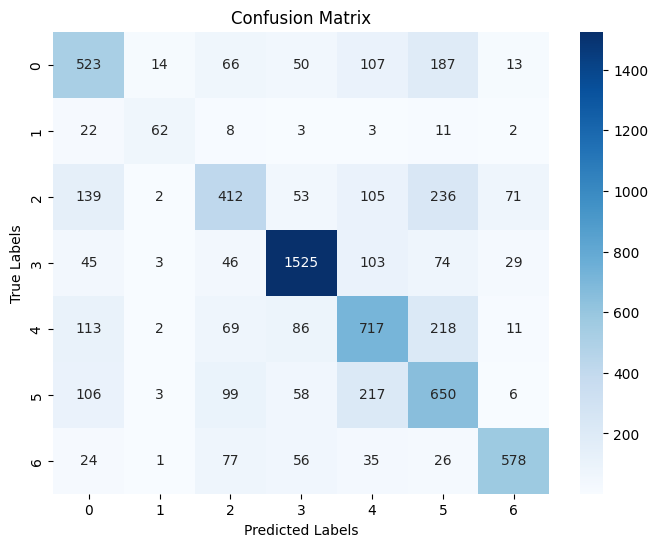

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming 'model' and 'x_test', 'y_test' are defined from the previous code
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_mat = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [73]:


from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import numpy as np



accuracy = accuracy_score(y_true, y_pred_classes)
f1 = f1_score(y_true, y_pred_classes, average='weighted') # Use weighted average for multiclass
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.6321822813472969
F1 Score: 0.6325832254759323
Precision: 0.6382360517015377
Recall: 0.6321822813472969


In [74]:
model_json = model.to_json()
with open("emotiondetector.json", "w") as json_file:
    json_file.write(model_json)
model.save("emotiondetector.keras")    

In [75]:
from keras.models import model_from_json

In [76]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.keras")

In [77]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [78]:
def ef(image):
    img = load_img(image,color_mode="grayscale" )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [79]:
images = 'images/train/sad/89.jpg'
print("original image is of sad")
img = ef(images)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print ("model prediction is ", pred_label)

original image is of sad
1/1 [==============================] - 0s 390ms/step
model prediction is  sad


In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of angry
1/1 [==============================] - 0s 67ms/step
model prediction is  angry


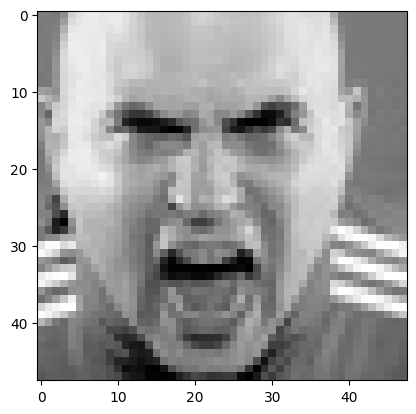

In [81]:
image = 'images/train/angry/22.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print ("model prediction is ", pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [82]:
import cv2